<a href="https://colab.research.google.com/github/AndreHiratsuka/AEDI_UNIFESP/blob/main/AndreEiki_ThiagoRoberto_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange> Módulo Aprendizagem:

> ## <font color=#EE9A4D> Obtenção dos Dados:



In [ ]:
from google.colab import drive # Conectando ao Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import zipfile
import numpy as np

In [ ]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Data/House_Sale/House_Sale.zip')  # aloca o arquivo zip

data = pd.read_csv(zf.open('kc_house_data.csv')) # abre o arquivo CSV 'kc_house_data.csv' presente dentro do ZIP
datacopy = data.copy() # Cria uma cópia do dataset original

In [ ]:
data.head() # Imprime os dados

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7      1180.0              0   
1      7242     2.0           0     0  ...      7      2170.0            400   
2     10000     1.0           0     0  ...      6       770.0              0   
3      5000     1.0           0     0  ...      7      1050.0            910   
4      8080     1.0           0     0  ...      8      1680.0              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

> ## <font color=#EE9A4D> Análise de Correlação e Exclusão de Dados Não Importantes:

<ipython-input-145-73cb6e68dc8d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr  = data.corr() # Calcula a correlação presente entre todos os elementos contidos na matriz de dados


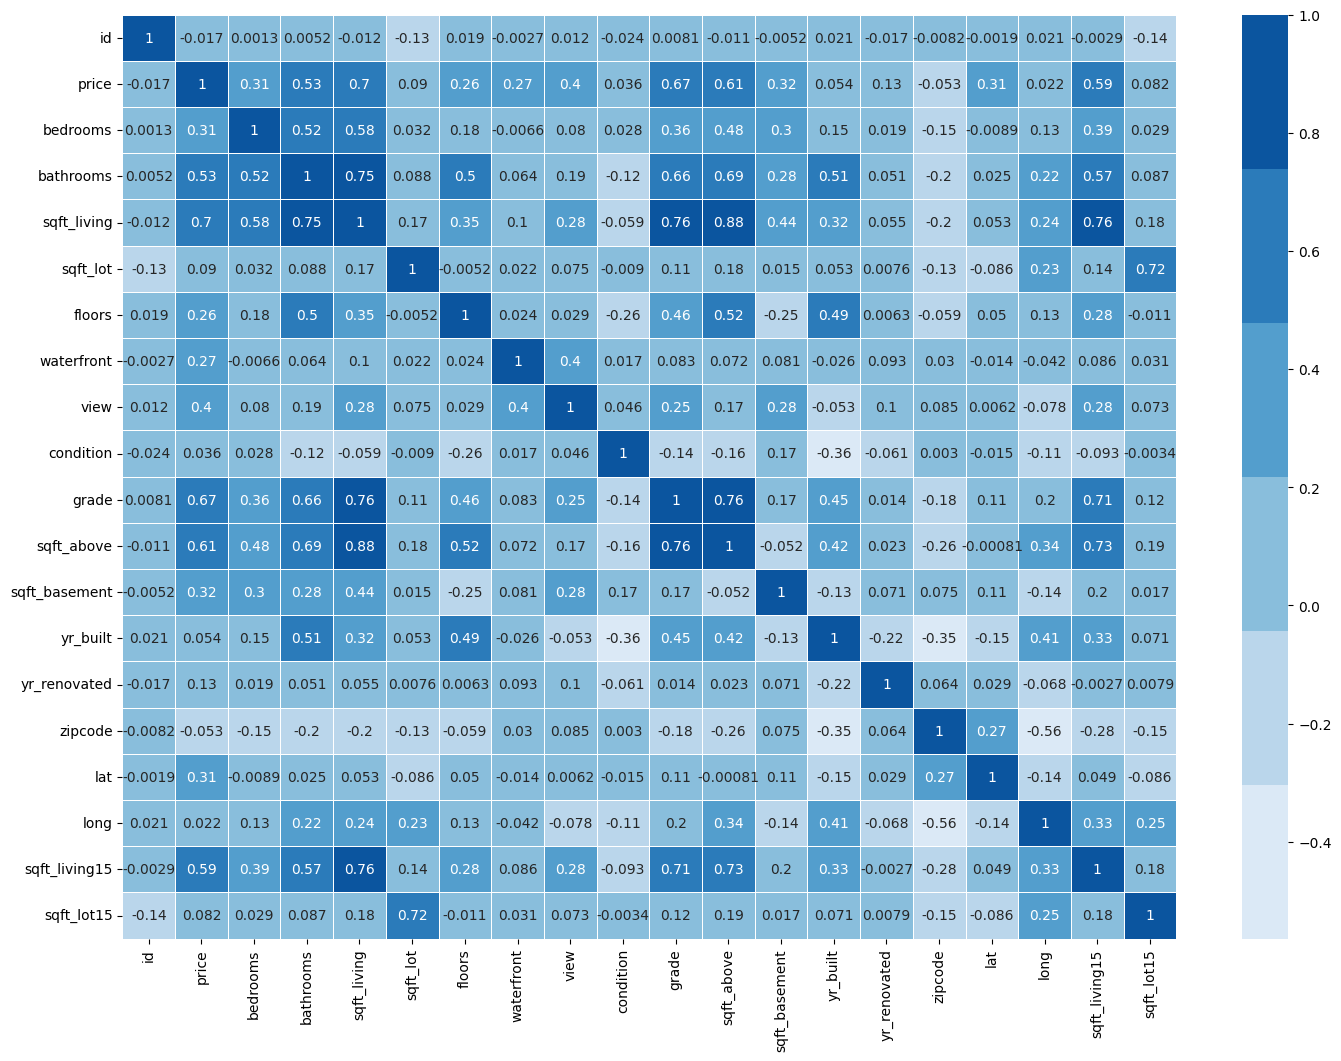

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr  = data.corr() # Calcula a correlação presente entre todos os elementos contidos na matriz de dados

f, ax = plt.subplots(figsize=(17, 12))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);

In [ ]:
# ID, date, lat e long são colunas visivelmente desnecessárias para o treinamente dos modelos
# Zipcode e Condition possuem uma baixa correlação com todos os outros elementos, por isso são da base de dados
data = data.drop(['id', 'date', 'lat', 'long', 'zipcode', 'condition'], axis=1) # Remove todas as colunas desnecessárias

> ## <font color=#EE9A4D> Tratando valores 'Not a Number'

In [ ]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# como NaN sempre nos causa problemas, (1) retiramos esse atributo ou (2) preenchemos com valores médios
np.where(data['sqft_above'].isnull().values==True)

(array([10, 17]),)

In [ ]:
data = data.drop([10, 17])
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

> ## <font color=#EE9A4D> Separando os dados

In [ ]:
from sklearn.model_selection import train_test_split # separa os dados em treinamento e teste de forma aleatória

y = data['price']
X = data.iloc[:, 1:17]
print(y.shape)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # Separando 20% do conjunto para teste

(21611,)
(21611, 14)


> ## <font color=#EE9A4D> Árvore de Decisão:

In [ ]:
from sklearn import tree
# Criando uma árvore de decisão com regressão e profundidade máxima de 5

clf = tree.DecisionTreeRegressor(random_state=0,max_depth=5)
clf = clf.fit(X_train, y_train)

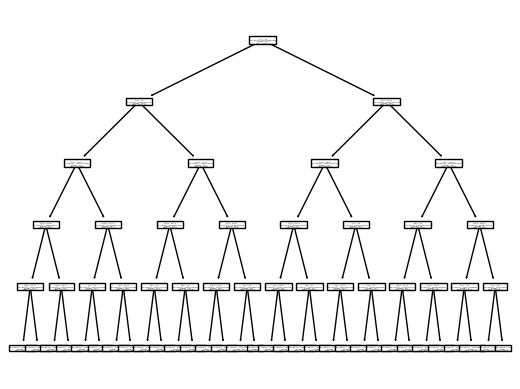

In [ ]:
tree.plot_tree(clf) # Plot da árvore
plt.show()

In [ ]:
dt_predicao = clf.predict(X_test) # Realiza as predições com o conjunto de teste

Decision Tree
MAE: 140910.5573310066
MSE: 48423791488.058525
RMSE: 220054.06492055202
Coefficient of determination: 0.68


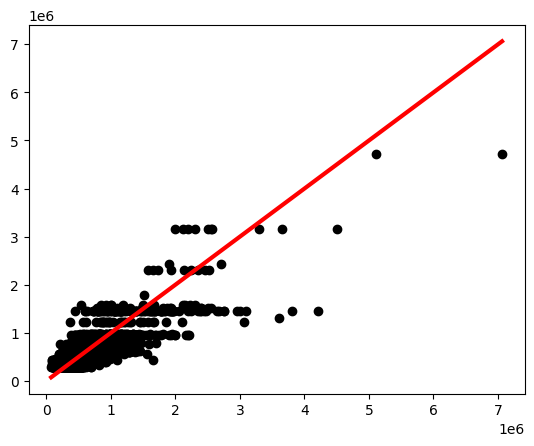

In [ ]:
from sklearn import metrics

print("Decision Tree") # Métricas calculadas
print('MAE:', metrics.mean_absolute_error(y_test, dt_predicao))
print('MSE:', metrics.mean_squared_error(y_test, dt_predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dt_predicao)))

print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, dt_predicao))

# Plot do comportamento de h(x) árvore de decisão e f(x) que representa o valor real
plt.scatter(y_test, dt_predicao, color="black")
plt.plot(np.arange(np.min(y_test),np.max(y_test)),
         np.arange(np.min(y_test),np.max(y_test)),color="red", linewidth=3)

plt.show()

> ## <font color=#EE9A4D> Modelo Linear

Coefficients: 
 [-4.11167972e+04  5.05972456e+04  1.07614377e+02  1.99367485e-02
  2.39212122e+04  5.16656137e+05  4.41196015e+04  1.18560002e+05
  4.94975559e+01  5.81168212e+01 -3.75215449e+03  2.77075916e+00
  2.83852469e+01 -5.66153102e-01]
MAE: 142166.15043139146
MSE: 49849510253.6566
RMSE: 223270.03886248733
Coefficient of determination: 0.67


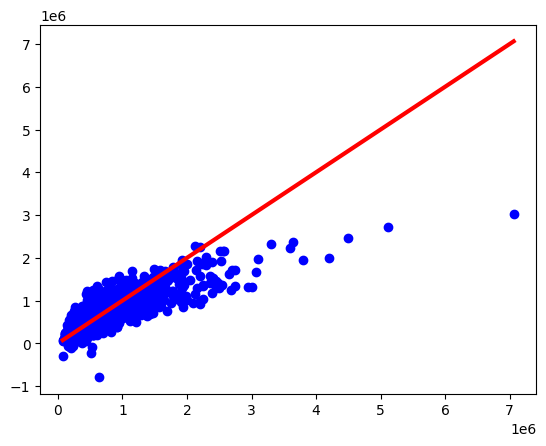

In [ ]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression() # Modelo linear com regressão

# Treina o modelo com o conjunto de treino
regr.fit(X_train, y_train)

# Realiza as predições com o conjunto de teste
regr_predicao = regr.predict(X_test)

# Métricas
print("Coefficients: \n", regr.coef_)
print('MAE:', metrics.mean_absolute_error(y_test, regr_predicao))
print('MSE:', metrics.mean_squared_error(y_test, regr_predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, regr_predicao)))
print("Coefficient of determination: %.2f" % metrics.r2_score(y_test, regr_predicao))

# Plot do comportamento de h(x) do modelo linear e f(x) que representa o valor real
plt.scatter(y_test, regr_predicao, color="blue")
plt.plot(np.arange(np.min(y_test),np.max(y_test)),np.arange(np.min(y_test),np.max(y_test)),color="red", linewidth=3)

plt.show()

> ## <font color=#EE9A4D> Rede Neural

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, regularizers
from tensorflow.keras.layers import Dense, Dropout, GaussianNoise
from tensorflow.keras.constraints import max_norm
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.metrics import mean_absolute_percentage_error

input_shape = (14, )
model = Sequential([
Dense(1000, input_shape=input_shape, activation='relu', kernel_regularizer=regularizers.L2(0.01)),
GaussianNoise(0.2), # Ruído
Dropout(0.2), # Poda 
Dense(1000, activation = 'relu', kernel_regularizer=regularizers.L2(0.01)), #  Regularização Ativa
Dropout(0.2), # Poda 
Dense(1000, activation = 'relu', kernel_constraint=max_norm(2.)), # Restrição de Pesos
Dropout(0.2),
Dense(64, activation = 'relu', kernel_regularizer=regularizers.L2(0.01)), #  Regularização Ativa
Dropout(0.2), # Poda 
Dense(8, activation = 'relu', kernel_regularizer=regularizers.L2(0.01)), #  Regularização Ativa
Dropout(0.2), # Poda 
Dense(1, activation='linear')
])

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2) # Treinando o modelo
rna_preds = model.predict(X_test) # Realiza a predição com o conjunto de teste

# Métricas
print('MAE:', metrics.mean_absolute_error(y_test, rna_preds))
print('MSE:', metrics.mean_squared_error(y_test, rna_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rna_preds)))
print('MAPE:', mean_absolute_percentage_error(y_test, rna_preds))

Epoch 1/10
433/433 [==============================] - 19s 43ms/step - loss: 182492.1406 - mean_squared_error: 75742576640.0000 - val_loss: 155818.0938 - val_mean_squared_error: 63973650432.0000
Epoch 2/10
433/433 [==============================] - 20s 46ms/step - loss: 180915.7969 - mean_squared_error: 74864910336.0000 - val_loss: 158782.0781 - val_mean_squared_error: 66090819584.0000
Epoch 3/10
433/433 [==============================] - 19s 44ms/step - loss: 181544.9531 - mean_squared_error: 74558070784.0000 - val_loss: 165530.6719 - val_mean_squared_error: 63739678720.0000
Epoch 4/10
433/433 [==============================] - 18s 42ms/step - loss: 183148.8750 - mean_squared_error: 75903025152.0000 - val_loss: 155367.5469 - val_mean_squared_error: 64319180800.0000
Epoch 5/10
433/433 [==============================] - 19s 44ms/step - loss: 183570.3281 - mean_squared_error: 76646121472.0000 - val_loss: 163280.9688 - val_mean_squared_error: 71438958592.0000
Epoch 6/10
433/433 [==========

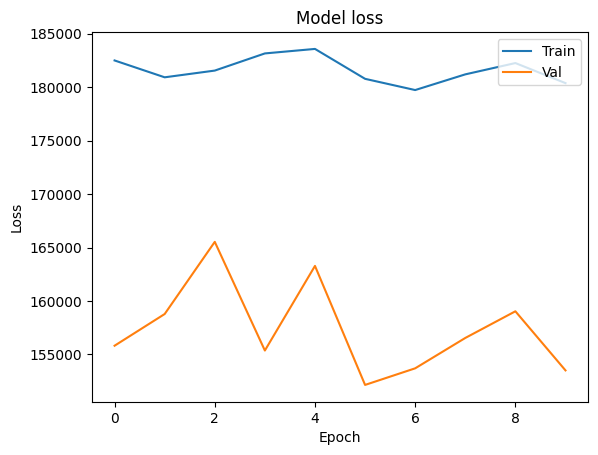

In [ ]:
# Plotando a Loss durante o treino e durante a validação do modelo
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

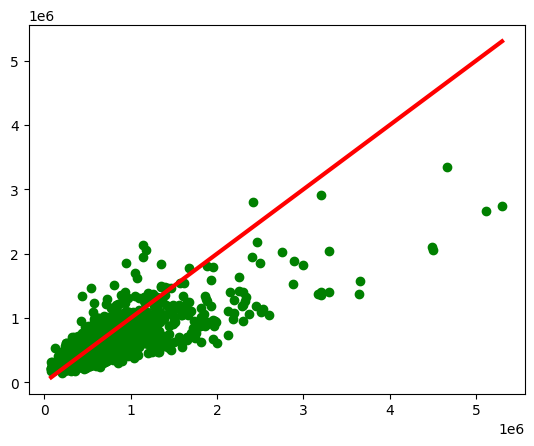

In [ ]:
# Plot do comportamento de h(x) da rede neural e f(x) que representa o valor real
plt.scatter(y_test, rna_preds[:, 0].flatten(), color='green')
plt.plot(np.arange(np.min(y_test),np.max(y_test)),np.arange(np.min(y_test),np.max(y_test)),color="red", linewidth=3)

plt.show()

> ## <font color=#EE9A4D> Análise de Resultados

ValueError: ignored

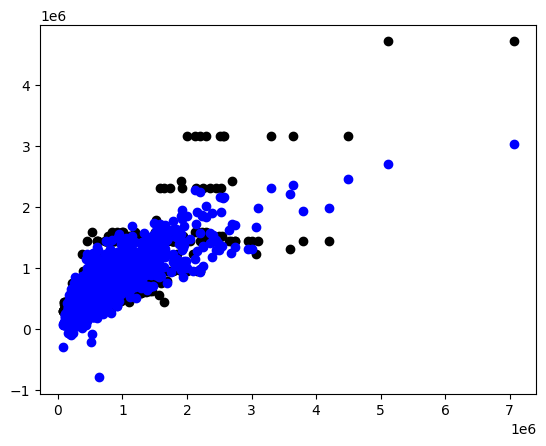

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot do comportamento de h(x) paras os três modelos anteriores e f(x)
ax.scatter(y_test, dt_predicao,  color="black") # Preto = Árvore de Decisão
ax.scatter(y_test, regr_predicao, color="blue") # Azul = Modelo Linear
ax.scatter(y_test, rna_preds[:, 0].flatten(), color='green') # Verde = Rede Neural
ax.plot(np.arange(np.min(y_test),np.max(y_test)),np.arange(np.min(y_test),np.max(y_test)),color="red", linewidth=3) # Vermelho = Valor Esperado

ax.figure.show()

In [ ]:
dt_diff = np.absolute(y_test - dt_predicao) # Cálculo da diferença absoluta entre o valor real e a predição da árvore de decisão
regr_diff = np.absolute(y_test - regr_predicao) # Cálculo da diferença absoluta entre o valor real e a predição do modelo linear
rna_diff = np.absolute(y_test - rna_preds.flatten()) # Cálculo da diferença absoluta entre o valor real e a predição da rede neural

# Menor e maior diferença registrada para cada modelo, com relação ao valor real
print("Min dt_diff: ", np.min(dt_diff)/100000, "Max dt_diff", np.max(dt_diff)/100000)
print("Min regr_diff: ", np.min(regr_diff), "Max regr_diff", np.max(regr_diff))
print("Min rna_diff: ", np.min(rna_diff), "Max rna_diff", np.max(rna_diff))

ValueError: ignored

In [ ]:
# Plot do valor real e a predição da árvore de decisão
dt_outcomes = pd.DataFrame({'Predicted value':dt_predicao, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
dt_outcomes = dt_outcomes.reset_index()
dt_outcomes = dt_outcomes.drop(['index'],axis=1)
plt.plot(dt_outcomes[:50])
plt.legend(['Actual value','Predicted value'])

In [ ]:
# Plot do valor real e a predição do modelo linear
regr_outcomes = pd.DataFrame({'Predicted value':regr_predicao, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
regr_outcomes = regr_outcomes.reset_index()
regr_outcomes = regr_outcomes.drop(['index'],axis=1)
plt.plot(regr_outcomes[:50])
plt.legend(['Actual value','Predicted value'])

In [ ]:
# Plot do valor real e a predição da rede neural
rna_outcomes = pd.DataFrame({'Predicted value':list(rna_preds), 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
rna_outcomes = rna_outcomes.reset_index()
rna_outcomes = rna_outcomes.drop(['index'],axis=1)
plt.plot(rna_outcomes[:50])
plt.legend(['Actual value','Predicted value'])

In [ ]:
# Plot do valor real e a predição da árvore de decisão e modelo linear
model_outcomes = pd.DataFrame({'DT':dt_predicao, 'Linear Model':regr_predicao, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
model_outcomes = model_outcomes.reset_index()
model_outcomes = model_outcomes.drop(['index'],axis=1)
plt.plot(model_outcomes[:50])
plt.legend(['Actual value','DT','Linear Model'])

In [ ]:
# Plot do valor real e a predição da árvore de decisão e rede neural
model_outcomes = pd.DataFrame({'DT':dt_predicao, 'RNA Model':rna_preds.flatten(), 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
model_outcomes = model_outcomes.reset_index()
model_outcomes = model_outcomes.drop(['index'],axis=1)
plt.plot(model_outcomes[:50])
plt.legend(['Actual value','DT', 'RNA Model'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Histograma referente a diferença entre o preço real e preço estimado pela árvore de decisão
n, bins, patches = plt.hist(dt_diff, density=True)
plt.xlabel('Diff Price')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Histograma referente a diferença entre o preço real e preço estimado pelo modelo linear
regr_diff.values.sort()
values = regr_diff.values
n, bins, patches = plt.hist(values, density=True)
plt.xlabel('Diff Price')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Histograma referente a diferença entre o preço real e preço estimado pela rede neural
rna_diff.values.sort()
values = regr_diff.values
n, bins, patches = plt.hist(values, density=True)
plt.xlabel('Diff Price')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()

In [ ]:
from sklearn import metrics 

# Salvando as métricas de cada modelo em listas
line1 = [metrics.mean_absolute_error(y_test, dt_predicao), metrics.mean_absolute_error(y_test, regr_predicao), metrics.mean_absolute_error(y_test, rna_preds)]
line2 = [metrics.mean_squared_error(y_test, dt_predicao), metrics.mean_squared_error(y_test, regr_predicao), metrics.mean_squared_error(y_test, rna_preds)]
line3 = [np.sqrt(metrics.mean_squared_error(y_test, dt_predicao)), np.sqrt(metrics.mean_squared_error(y_test, regr_predicao)), np.sqrt(metrics.mean_squared_error(y_test, rna_preds))]
line4 = [mean_absolute_percentage_error(y_test, dt_predicao), mean_absolute_percentage_error(y_test, regr_predicao), mean_absolute_percentage_error(y_test, rna_preds)]                                                                                                                                                                                                                                                                          

In [ ]:
# Plot de tabela comparativa entre os 3 modelos
fig, ax = plt.subplots()
colors = plt.cm.BuPu(np.linspace(0, 0.5, 4))

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=[line1, line2, line3, line4], 
         rowLabels = ['MAE', 'MSE', 'RMSE', 'MAPE'], 
         colLabels = ['Decision Tree', 'Linear Model', 'RNA Model'], 
         colColours = colors, 
         loc='center')

fig.tight_layout()

plt.show()

> ## <font color=#EE9A4D> 5-Fold Crossvalidation

In [ ]:
# Crossvalidation protocol

import numpy as np
from sklearn.model_selection import KFold
import torch

y = data['price']
X = data.iloc[:, 1:17]

kf = KFold(n_splits=5,shuffle=True) # Define em quantas partes o conjunto será dividido
kf.get_n_splits(X)

print(kf)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i+1}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")


KFold(n_splits=5, random_state=None, shuffle=True)
Fold 1:
  Train: index=[    0     2     4 ... 21608 21609 21610]
  Test:  index=[    1     3     5 ... 21601 21604 21606]
Fold 2:
  Train: index=[    1     2     3 ... 21608 21609 21610]
  Test:  index=[    0     4     6 ... 21587 21602 21605]
Fold 3:
  Train: index=[    0     1     2 ... 21607 21608 21610]
  Test:  index=[    8    18    22 ... 21592 21600 21609]
Fold 4:
  Train: index=[    0     1     2 ... 21608 21609 21610]
  Test:  index=[    9    11    17 ... 21597 21603 21607]
Fold 5:
  Train: index=[    0     1     3 ... 21606 21607 21609]
  Test:  index=[    2     7    14 ... 21598 21608 21610]


In [ ]:
X_train = X.values[train_index]
print("X_train: ",X_train.shape)
y_train = y.values[train_index]
print("y_train: ",y_train.shape)

X_test = X.values[test_index]
print("X_test: ",X_test.shape)
y_test = y.values[test_index]
print("y_test: ",y_test.shape)

X_train:  (17289, 14)
y_train:  (17289,)
X_test:  (4322, 14)
y_test:  (4322,)


In [ ]:
from sklearn import metrics
import torch

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"\nFold {i+1}:")

    X_train = X.values[train_index]
    y_train = y.values[train_index]
    
    X_test = X.values[test_index]
    y_test = y.values[test_index]

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)
    rna_preds = model.predict(X_test, verbose=0)

    torch.save((X_test, y_test), f'./AndreEiki_ThiagoRoberto_FOLDS/Valores_de_Teste_Fold{i+1}.pth') # Salva o conjunto de teste de cada fold
    torch.save((X_train, y_train), f'./AndreEiki_ThiagoRoberto_FOLDS/Valores_de_Treino_Fold{i+1}.pth') # Salva o conjunto de treino de cada fold
    model.save_weights('./AndreEiki_ThiagoRoberto_FOLDS/AndreEiki_ThiagoRoberto_RNA_FOLD'+str(i+1)) # Salva os pesos utilizados em cada Fold

    print('MAE:', metrics.mean_absolute_error(y_test, rna_preds))
    print('MSE:', metrics.mean_squared_error(y_test, rna_preds))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rna_preds)))
    print('MAPA:', mean_absolute_percentage_error(y_test, rna_preds))


Fold 1:
Epoch 1/10
433/433 [==============================] - 19s 44ms/step - loss: 186832.0625 - mean_squared_error: 81730568192.0000 - val_loss: 160173.8125 - val_mean_squared_error: 68450357248.0000
Epoch 2/10
433/433 [==============================] - 19s 44ms/step - loss: 187423.4844 - mean_squared_error: 81935425536.0000 - val_loss: 169055.6250 - val_mean_squared_error: 73302138880.0000
Epoch 3/10
433/433 [==============================] - 19s 44ms/step - loss: 186755.7188 - mean_squared_error: 81097203712.0000 - val_loss: 158097.6562 - val_mean_squared_error: 64151232512.0000
Epoch 4/10
433/433 [==============================] - 20s 46ms/step - loss: 185799.2031 - mean_squared_error: 81693147136.0000 - val_loss: 173309.8594 - val_mean_squared_error: 80670474240.0000
Epoch 5/10
433/433 [==============================] - 18s 42ms/step - loss: 188038.7500 - mean_squared_error: 83858112512.0000 - val_loss: 157160.2188 - val_mean_squared_error: 61770256384.0000
Epoch 6/10
433/433 [=

In [ ]:
data['new_price'] = model.predict(X) # Criando nova coluna com os preços estimados pela rede neural

676/676 [==============================] - 5s 7ms/step


# <font color=orange> Módulo Interface:

> ## <font color=#EE9A4D> Gerando Mapa:

In [ ]:
import folium 

map = folium.Map(location=[47.608013, -122.257], zoom_start=8, tiles = 'stamenterrain')

In [ ]:
map

> ## <font color=#EE9A4D> Heatmap:

In [ ]:
from folium.plugins import HeatMap

HeatMap(datacopy.iloc[:, [-4, -3, 2]], min_opacity = 0.2, name = 'heatmap').add_to(map) # Cria um heat map baseado nos preços das casas
map

> ## <font color=#EE9A4D> Aplicando Borda em Washington:

In [ ]:
borderStyle = {
    'color': 'red',
    'weight': 2,
}

folium.GeoJson('/content/drive/MyDrive/Data/House_Sale/us-states.json', 
               name = 'Washington',
               style_function=lambda x: borderStyle).add_to(map)


In [ ]:
map

In [ ]:
folium.LayerControl().add_to(map)
map

> ## <font color=#EE9A4D> Plotando casas:

In [ ]:
datacopy['new_price'] = data['new_price'] # Adiciona uma nova coluna 'new_price' ao dataset cópia

In [ ]:
datacopy.price.quantile([0.25, 0.5, 0.75]) # Encontrando os quartis da coluna preço

0.25    321950.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64

In [ ]:
i = 0
for index, row in datacopy.iterrows(): # Aplicando marcadores personalizados a cada casa
    # Popup que aparece ao clicar em um marcador
    popup = (folium.Html('<b>Price:</b> U$' + str(row['price']) + 
                        '<br><b>New Price:</b> U$' + str(row['new_price']) +
                        '<br><b>Bedrooms:</b> ' + str(row['bedrooms']) + 
                        '<br><b>Bathrooms:</b> ' + str(row['bathrooms']) +
                        '<br><b>Living Area:</b> ' + str(row['sqft_living']) + 'm²' +
                        '<br><b>Lot Area:</b> ' + str(row['sqft_lot']) +  'm²' +
                        '<br><b>Floors:</b> ' + str(row['floors']) +
                        '<br><b>Waterfront:</b> ' + str(row['waterfront']) +
                        '<br><b>Condition:</b> ' + str(row['condition']) +
                        '<br><b>Grade:</b> ' + str(row['grade']) +
                        '<br><b>Above:</b> ' + str(row['sqft_above']) +  'm²' +
                        '<br><b>Basement:</b> ' + str(row['sqft_basement']) +  'm²' +
                        '<br><b>Year Built:</b> ' + str(row['yr_built']) + 
                        '<br><b>Year Renovated:</b> ' + str(row['yr_renovated']) +
                        '<br><b>Zipcode:</b> ' + str(row['zipcode']), script=True))

    if (row['price'] >= 645000.0): # Marcadores para as 25% casas mais caras
      folium.Marker(location = [row['lat'], row['long']],
                  icon = folium.Icon(icon = 'glyphicon-home', color='darkred'),
                  tooltip = 'ID: ' + str(row['id']),
                  popup=folium.Popup(popup, max_width=500)).add_to(map)

    elif (row['price'] < 645000.0 and row['price'] >= 450000.0): # Marcadores para as casas mais próximas da mediana
      folium.Marker(location = [row['lat'], row['long']],
                  icon = folium.Icon(icon = 'glyphicon-home', color='orange'),
                  tooltip = 'ID: ' + str(row['id']),
                  popup=folium.Popup(popup, max_width=500)).add_to(map)
    else: # Marcadores para as 25% casas mais baratas
      folium.Marker(location = [row['lat'], row['long']],
                  icon = folium.Icon(icon = 'glyphicon-home', color='green'),
                  tooltip = 'ID: ' + str(row['id']),
                  popup=folium.Popup(popup, max_width=500)).add_to(map)
    i += 1
    if i > 1000: # Marca apenas as 1000 primeiras casas
      break
map

> ## <font color=#EE9A4D> Salvando Mapa:

In [ ]:
map.save('mapa.html')